In [10]:
import serial
import numpy as np
import csv
import matplotlib.pyplot as plt

namaFile = input("Masukkan nama file :")
ser = serial.Serial("/dev/ttyUSB0", 115200)

while True:
    nilaiSensor = input("Masukkan nilai mm H20 :")
    
    adc = ser.readline().decode('utf-8').split('\r\n')[0]
    with open(namaFile + ".csv", 'a', newline = '') as f:
        writer = csv.writer(f)
        writer.writerow([nilaiSensor, adc])

SLOPE : [-16.66666667]
INTERCEPT : 686.6666666666666


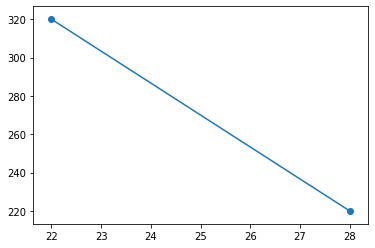

In [35]:
from sklearn.linear_model import LinearRegression

allData = [[],[]]
with open('coba.csv', 'r') as csvFile:
    readCSV = csv.reader(csvFile, delimiter = ',')
    for row in readCSV :
#         print(float(row[0]))
        allData[0].append(float(row[0]))
        allData[1].append(float(row[1]))

mmh20 = np.array(allData[0])
adc = np.array(allData[1])
adc = adc.reshape(-1, 1)

model = LinearRegression()
model.fit(adc, mmh20)
print("SLOPE : " + str(model.coef_))
print("INTERCEPT : " + str(model.intercept_))
predict = model.predict(adc)
plt.plot(adc, mmh20)
plt.scatter(adc, predict)
plt.show()

[220.0, 320.0]